# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['freshapples', 'freshbanana', 'freshoranges', 
           'rottenapples', 'rottenbanana', 'rottenoranges']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize((32, 32))
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        y = np.vstack([y, _class])

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2088 [00:00<?, ?it/s]

  0%|          | 0/1962 [00:00<?, ?it/s]

  0%|          | 0/1854 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/2754 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Traning & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [8]:
neigh = KNeighborsClassifier(n_neighbors=3)

## 6.2. Train Model

In [9]:
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# 7. Prediction

## 7.1. Training Set

In [11]:
y_pred_train = neigh.predict(X_train_scaled)

## 7.2. Test Set

In [12]:
y_pred_test = neigh.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

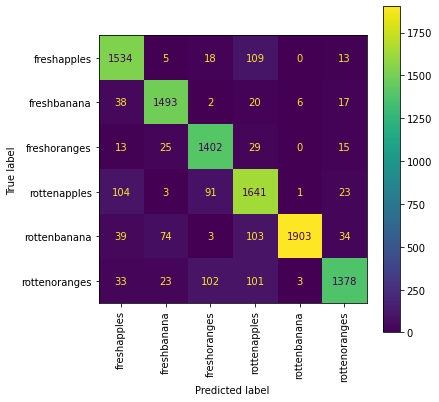

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(neigh, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [14]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [15]:
print('accuracy =', report['accuracy'])

accuracy = 0.8993075591459896


In [16]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
freshapples,0.871096,0.913639,0.891860,1679.000000
freshbanana,0.919901,0.947335,0.933417,1576.000000
freshoranges,0.866502,0.944744,0.903933,1484.000000
rottenapples,0.819271,0.880837,0.848939,1863.000000
rottenbanana,0.994773,0.882653,0.935365,2156.000000
rottenoranges,0.931081,0.840244,0.883333,1640.000000
accuracy,0.899308,0.899308,0.899308,0.899308
macro avg,0.900437,0.901575,0.899475,10398.000000
weighted avg,0.903657,0.899308,0.899868,10398.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

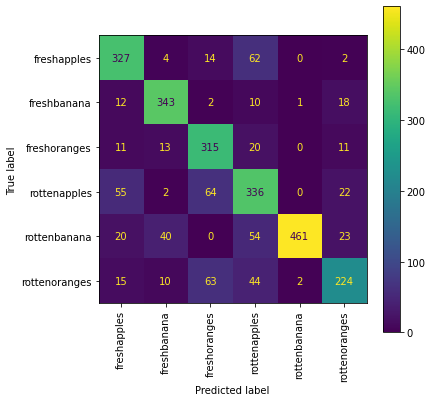

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(neigh, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [18]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [19]:
print('accuracy =', report['accuracy'])

accuracy = 0.7715384615384615


In [20]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
freshapples,0.743182,0.799511,0.770318,409.000000
freshbanana,0.832524,0.888601,0.859649,386.000000
freshoranges,0.687773,0.851351,0.760870,370.000000
rottenapples,0.638783,0.701461,0.668657,479.000000
rottenbanana,0.993534,0.770903,0.868173,598.000000
rottenoranges,0.746667,0.625698,0.680851,358.000000
accuracy,0.771538,0.771538,0.771538,0.771538
macro avg,0.773744,0.772921,0.768086,2600.000000
weighted avg,0.787388,0.771538,0.773694,2600.000000


# 9. Save Model

In [21]:
import pickle

In [22]:
pickle.dump((neigh, scaler), open('fruit_industry_model.pickle', 'wb'))